In [1]:
%tensorflow_version 2.0

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [4]:
tf.__version__

'2.1.0-rc1'

In [0]:
# import all necessary packages
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
from scipy.stats import zscore
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [7]:
# run this cell to upload file if you are using google colab
from google.colab import files
files.upload()

Saving bank.csv to bank.csv


{'bank.csv': b"RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited\r\n1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1\r\n2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0\r\n3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1\r\n4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0\r\n5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0\r\n6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1\r\n7,15592531,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0\r\n8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1\r\n9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.5,0\r\n10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0\r\n11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0\r\n12,15737173,Andrews,497,Spain,Male,24,3,0,2,1,0,76390.01,0\r\n13,15632264,Kay,476,France,Female,34,10,0,2,1

In [8]:
# load the dataset
df_bank = pd.read_csv("bank.csv")
print("Shape: ",df_bank.shape)
df_bank.head()

Shape:  (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
# check missing values..
df_bank.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
uniqueValues = df_bank.nunique()
print('Count of unique value sin each column :')
print(uniqueValues)

Count of unique value sin each column :
RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


Observation : 

Following attributes have unique values close to the dataset count and hence can be dropped for anlysis: "RowNumber", "CustomerId", "Surname"

2. Drop the columns which are unique for all users like IDs (2.5 points)

In [0]:
# Dropping the columns which are unique for all users
drop_attrs = ["RowNumber", "CustomerId", "Surname"]   #considering the colmns that should be dropped as array 
df_bank.drop(labels=drop_attrs,axis = 1, inplace=True)   #feeding the drop attrs to the function and dropping the values

In [16]:
print("Shape: ",df_bank.shape)
df_bank.head(20)

Shape:  (10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
df_bank.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


Analysing the attributes

In [0]:
# utilify function for % distribution
def category_distribution(df, colname):
    col_data = df[colname].value_counts().to_frame()
    col_data.reset_index(inplace=True)
    col_data.columns = [col_data.columns[1], 'count']
    col_data['proportions'] = col_data['count'] / sum(col_data['count'])
    print("\n % Distribution for: ",colname)
    print("\n", col_data)
    return

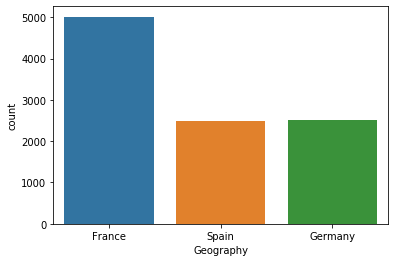

In [22]:
# plotting count of Geography
sns.countplot(data=df_bank , x='Geography')
plt.show()

In [21]:
category_distribution(df_bank, "Geography")


 % Distribution for:  Geography

   Geography  count  proportions
0    France   5014       0.5014
1   Germany   2509       0.2509
2     Spain   2477       0.2477


In [47]:
col_data = df_bank['Geography'].value_counts()
col_data

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [0]:
col_data = df_bank['Geography'].value_counts().to_frame()   #to_frame function difference

In [49]:
col_data

,Geography
France,5014
Germany,2509
Spain,2477


In [0]:
col_data.reset_index(inplace=True) #since there is a chance of change in the index while adding a column to dataframe data we are resetting the index

In [41]:
col_data.columns 

Index(['index', 'Geography'], dtype='object')

In [0]:
col_data.columns = [col_data.columns[1], 'count']#including the geograpthy column as first column and count column as second column in col_data - dataframe

In [52]:
col_data

,Geography,count
0,France,5014
1,Germany,2509
2,Spain,2477


In [0]:
col_data['proportions'] = col_data['count'] / sum(col_data['count']) #including a proportion into the col_Data frame

In [54]:
col_data

,Geography,count,proportions
0,France,5014,0.5014
1,Germany,2509,0.2509
2,Spain,2477,0.2477


# Attribute: Gender

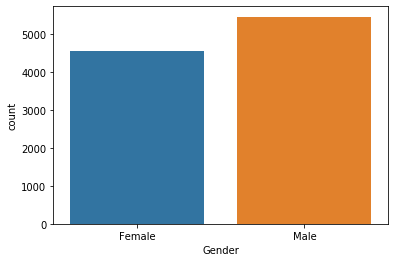


 % Distribution for:  Gender

    Gender  count  proportions
0    Male   5457       0.5457
1  Female   4543       0.4543


In [55]:
# plotting count of Gender
sns.countplot(data=df_bank , x='Gender')
plt.show()

category_distribution(df_bank, "Gender")

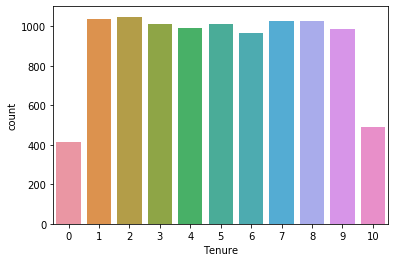


 % Distribution for:  Tenure

     Tenure  count  proportions
0        2   1048       0.1048
1        1   1035       0.1035
2        7   1028       0.1028
3        8   1025       0.1025
4        5   1012       0.1012
5        3   1009       0.1009
6        4    989       0.0989
7        9    984       0.0984
8        6    967       0.0967
9       10    490       0.0490
10       0    413       0.0413


In [56]:
# plotting count of Tenure
sns.countplot(data=df_bank , x='Tenure')
plt.show()

category_distribution(df_bank, "Tenure")

# Attribute: NumOfProducts

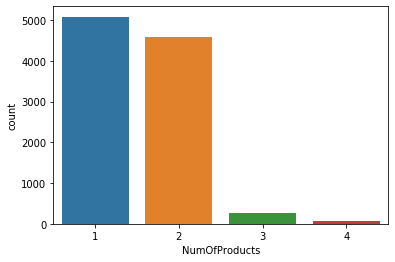


 % Distribution for:  NumOfProducts

    NumOfProducts  count  proportions
0              1   5084       0.5084
1              2   4590       0.4590
2              3    266       0.0266
3              4     60       0.0060


In [58]:
sns.countplot(data=df_bank , x='NumOfProducts')
plt.show()

category_distribution(df_bank, "NumOfProducts")

## Attribute: HasCrCard

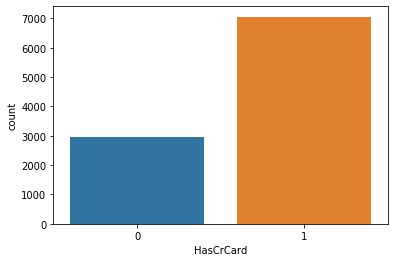


 % Distribution for:  HasCrCard

    HasCrCard  count  proportions
0          1   7055       0.7055
1          0   2945       0.2945


In [59]:
# plotting count of HasCrCard
sns.countplot(data=df_bank , x='HasCrCard')
plt.show()

category_distribution(df_bank, "HasCrCard")

# Attribute: IsActiveMember

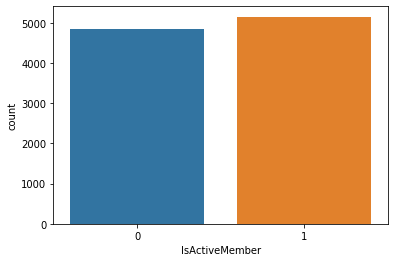


 % Distribution for:  IsActiveMember

    IsActiveMember  count  proportions
0               1   5151       0.5151
1               0   4849       0.4849


In [60]:
# plotting count of IsActiveMember
sns.countplot(data=df_bank , x='IsActiveMember')
plt.show()

category_distribution(df_bank, "IsActiveMember")

# Analysing target column distribution: Exited

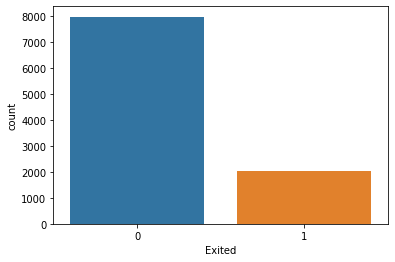


 % Distribution for:  Exited

    Exited  count  proportions
0       0   7963       0.7963
1       1   2037       0.2037


In [61]:
# plotting count of IsActiveMember
sns.countplot(data=df_bank , x='Exited')
plt.show()

category_distribution(df_bank, "Exited")

In [62]:
df_bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Attribute: "CreditScore", "Balance", "EstimatedSalary"
# These are non continuous numeric values, perform histogram and boxplot analysis

In [0]:
numerical_cols = ["CreditScore", "Balance", "EstimatedSalary"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f901116d9e8>,
      dtype=object)

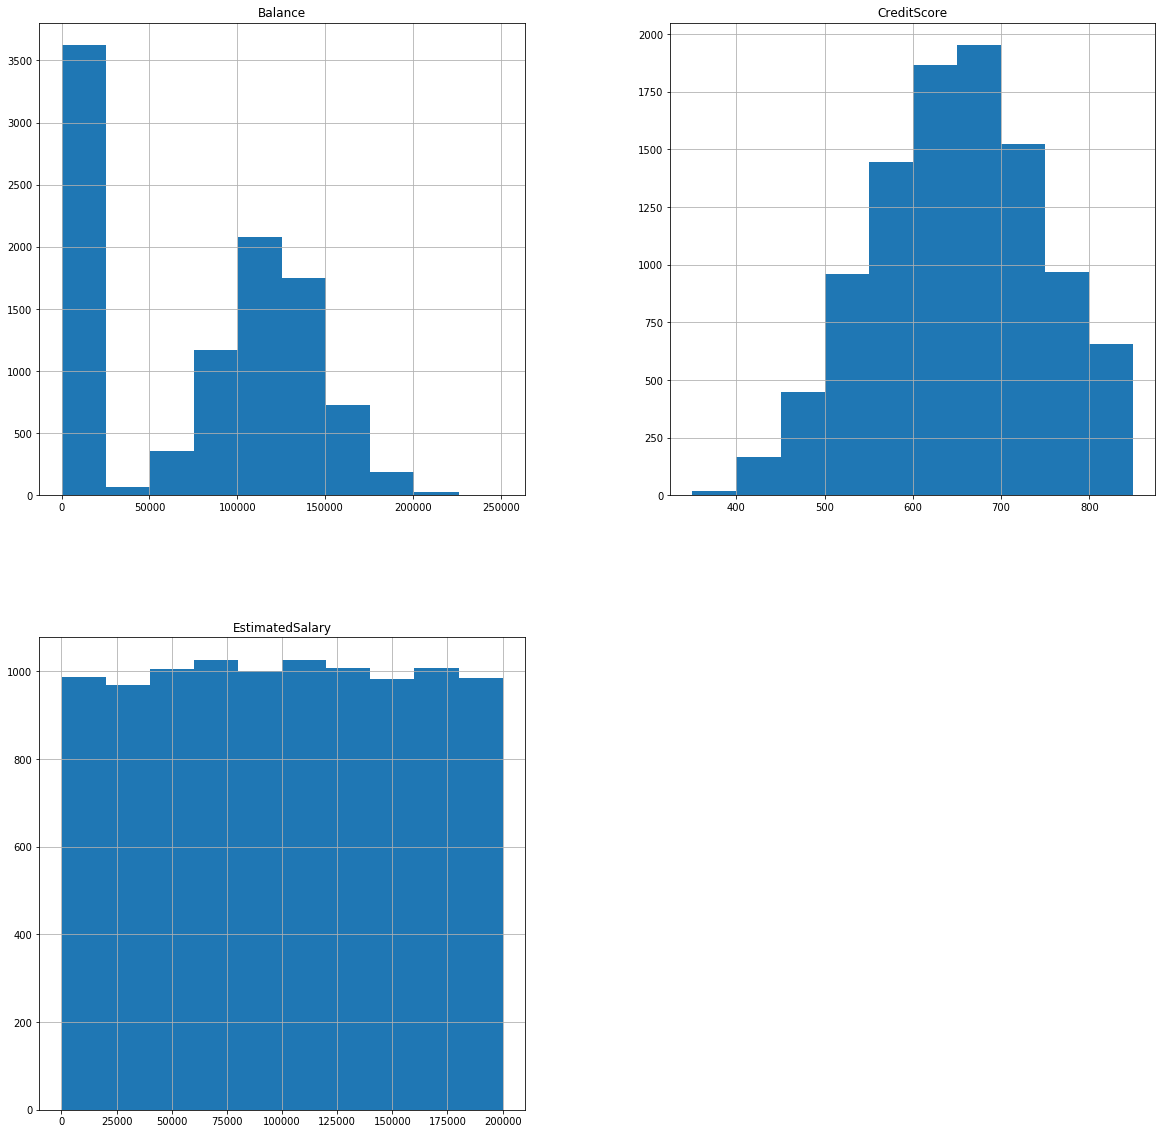

In [66]:
# perform univariant analysis by generating histogram of all dimensions
df_bank[numerical_cols].hist(figsize = [20,20])

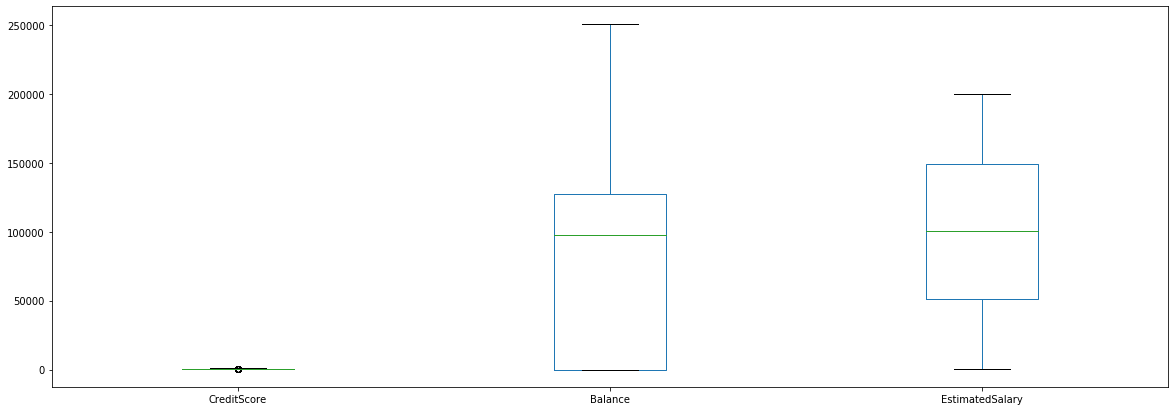

In [79]:
df_bank[numerical_cols].plot(kind='box', layout=(1,4), fontsize=10, figsize=(20,7))
plt.show()

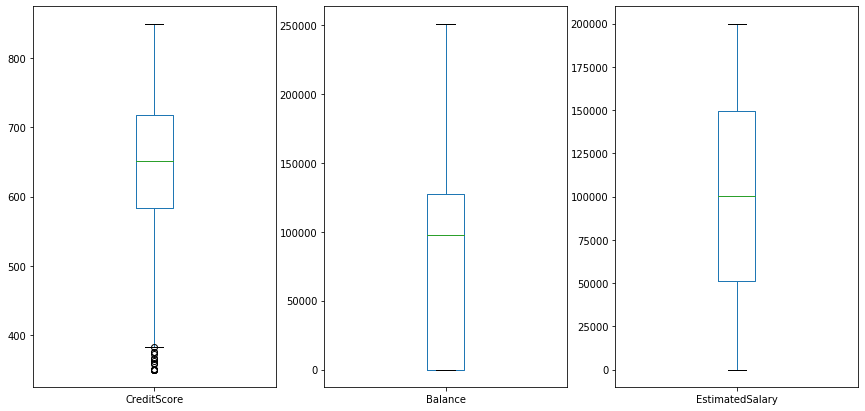

In [80]:
df_bank[numerical_cols].plot(kind='box', subplots=True, layout=(1,4), fontsize=10, figsize=(20,7))
plt.show()

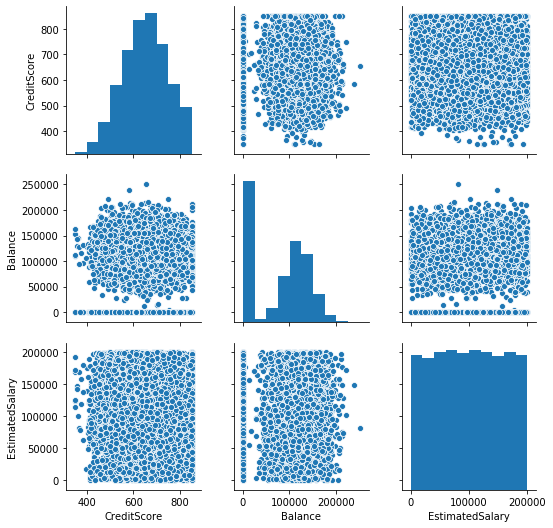

In [77]:
# bivariable analysis
sns.pairplot(df_bank[numerical_cols])

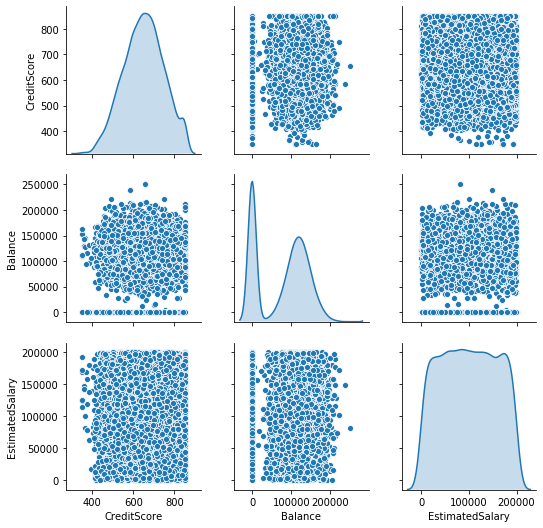

In [78]:
# bivariable analysis
sns.pairplot(df_bank[numerical_cols], diag_kind="kde")

In [81]:
# % of dateset having Balance as zero
df_bank["Balance"]==0

0        True
1       False
2       False
3        True
4       False
        ...  
9995     True
9996    False
9997     True
9998    False
9999    False
Name: Balance, Length: 10000, dtype: bool

In [82]:
df_bank[df_bank["Balance"]==0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.0,2,1,0,96270.64,0


In [83]:
len(df_bank[df_bank["Balance"]==0])

3617

In [90]:
len(df_bank["Balance"]==0) #This brings length of all the records in the dataframe as true and false,
                           #hence we are picking the true records whose value is == 0 from the dataframe and finding the length of it
    

10000

In [84]:
df_bank.shape[0]

10000

In [86]:
# % of dateset having Balance as zero
bal_zero = len(df_bank[df_bank["Balance"]==0])/df_bank.shape[0]
print("% of dataset having zero balance: ", bal_zero)

% of dataset having zero balance:  0.3617


In [0]:
# Analysing independent variable correlation with each other and target variable
corr_matrix = df_bank.corr()

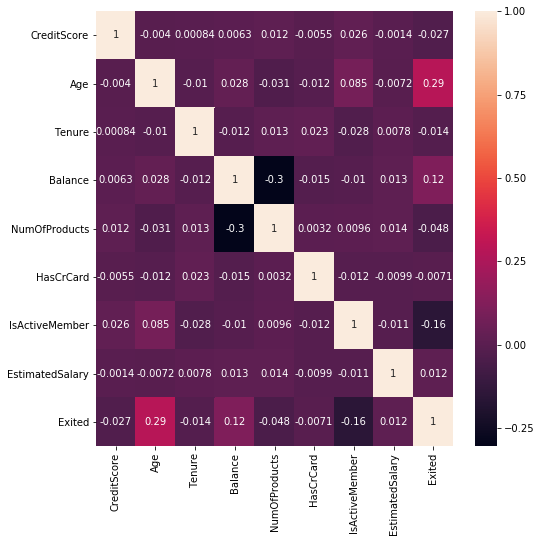

In [94]:
plt.subplots(figsize = (8,8))
sns.heatmap(corr_matrix,annot = True)

EDA : Findings

Dropped Attributes

Following attributes are uniques to the users and dropped from analysis: "RowNumber", "CustomerId", "Surname"

Observation on categorical attributes "Geography", "Gender", "Tenure","NumOfProducts", "HasCrCard", "IsActiveMember"

NumOfProducts: there are 4 unique values(1,2,3,4_. value of 3,4 contibutes only 2.6 % and 0.6%
"Geography", "Gender": are non-numeric data categorical attribute and hence required label encoding
Observations on continuous attributes ("CreditScore", "Balance", "EstimatedSalary")

"Balance" attributes: approx 36% of dataset contains values of zero. two gausian curve are observed which might indicates two data sources or existing of clusters
"CreditScore" attribute: outliers exist in lower side.
Scaling is required as all three attribuets have different ranges

Traget class: Exited

Target class is not balanced. Non-Exited contribute majority of class around 79%

## Data Preprocessing based on above findings

# Convert categorical columns Gender and Geograpth into categorical columns

In [0]:
# converts categorical text into categorical numbers.
labelencoder = LabelEncoder()
df_bank['Geography'] = labelencoder.fit_transform(df_bank['Geography'])
df_bank['Gender'] = labelencoder.fit_transform(df_bank['Gender'])

In [96]:
df_bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [97]:
df_bank.info() #To Check whether the categorical variables converted from object to int variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null int64
Gender             10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


# Handling Outliers

In [0]:
def treat_upper_outliers(df, colname):
    data = df[colname]
    irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)
    ub = np.quantile(a=data,q=0.75) + 1.5 * irq
    df[colname] = df[colname].apply(lambda x: ub if x > ub else x)

In [105]:
df_bank.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [0]:
#splitting the above function
data = df_bank['CreditScore']

In [0]:
irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)

In [103]:
irq

134.0

In [0]:
ub = np.quantile(a=data,q=0.75) + 1.5 * irq

In [107]:
ub

919.0

In [0]:
df_bank['CreditScore_1'] = df_bank['CreditScore'].apply(lambda x: ub if x > ub else x) 
#the lambda function means if x value > ub i.e if X value(from the creditscrore column) is > 919 then 919 should be populated, which means the higher values
#should be treated with maximum upper limit
                                                                     

In [112]:
df_bank['CreditScore_1'].head(40) 

0     619
1     608
2     502
3     699
4     850
5     645
6     822
7     376
8     501
9     684
10    528
11    497
12    476
13    549
14    635
15    616
16    653
17    549
18    587
19    726
20    732
21    636
22    510
23    669
24    846
25    577
26    756
27    571
28    574
29    411
30    591
31    533
32    553
33    520
34    722
35    475
36    490
37    804
38    850
39    582
Name: CreditScore_1, dtype: int64

In [0]:
# function to replace lower outlier with their min value of (Q1 - 1.5 * IRQ)
def treat_lower_outliers(df, colname):
    data = df[colname]
    irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)
    lb = np.quantile(a=data,q=0.25) - 1.5 * irq
    df[colname] = df[colname].apply(lambda x: lb if x < lb else x)

In [0]:
df_bank_treated = df_bank.copy(deep = True)  # make copy of orignal dataframe

# outlier treatment for "CreditScore"
treat_lower_outliers(df_bank_treated, "CreditScore")

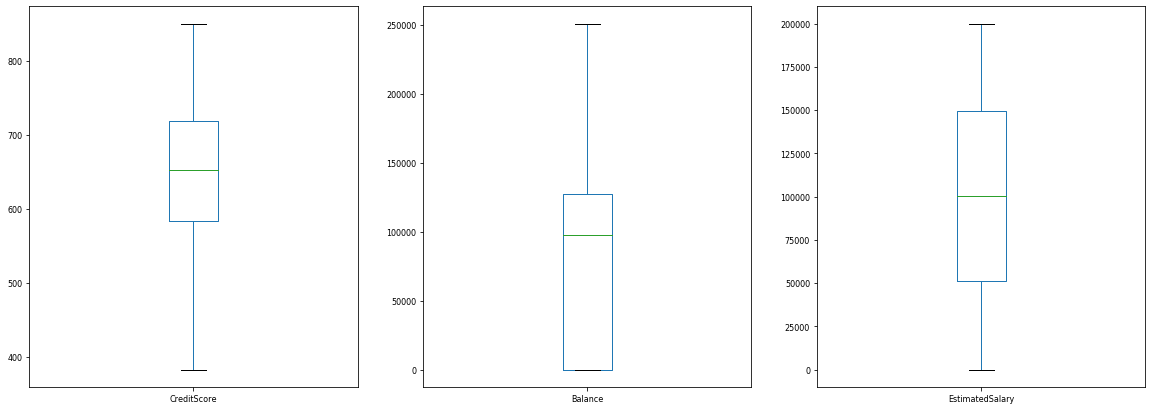

In [115]:
df_bank_treated[numerical_cols].plot(kind='box', subplots=True, layout=(1,3), fontsize=8, figsize=(20,7))
plt.show()

In [116]:
print("Shape: ", df_bank_treated.shape)
df_bank_treated.head() #we have creadit_scrore_1 column added due to trail and error mistake it can be ignored

Shape:  (10000, 12)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_1
0,619.0,0,0,42,2,0.00,1,1,1,101348.88,1,619
1,608.0,2,0,41,1,83807.86,1,0,1,112542.58,0,608
2,502.0,0,0,42,8,159660.80,3,1,0,113931.57,1,502
3,699.0,0,0,39,1,0.00,2,0,0,93826.63,0,699
4,850.0,2,0,43,2,125510.82,1,1,1,79084.10,0,850


In [118]:
df_bank.shape

(10000, 12)

# The shape of both the original and treated dataframe remains the same

In [0]:
df_bank = df_bank.drop(['CreditScore_1'],axis = 1)

In [122]:
df_bank.shape

(10000, 11)

In [0]:
df_bank_treated = df_bank_treated.drop(['CreditScore_1'],axis = 1)

In [123]:
df_bank_treated.shape

(10000, 11)

# 3. Distinguish the feature and target set (2.5 points)

In [0]:
df_features = df_bank_treated.drop(labels="Exited",axis=1)
df_target = df_bank_treated[["Exited"]]

In [126]:
df_features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,0,0,42,2,0.00,1,1,1,101348.88
1,608.0,2,0,41,1,83807.86,1,0,1,112542.58
2,502.0,0,0,42,8,159660.80,3,1,0,113931.57
3,699.0,0,0,39,1,0.00,2,0,0,93826.63
4,850.0,2,0,43,2,125510.82,1,1,1,79084.10


In [127]:
df_features.shape

(10000, 10)

In [128]:
df_target.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [131]:
df_features.dtypes

CreditScore        float64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [133]:
df_target.dtypes

Exited    int64
dtype: object

In [0]:
X_arr = np.array(df_features).astype('float32') #changing the entire dataset into single dimensional array
Y_arr = np.array(df_target).astype('float32')

In [135]:
X_arr[0:10]

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, 4.2000000e+01,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, 4.1000000e+01,
        1.0000000e+00, 8.3807859e+04, 1.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, 4.2000000e+01,
        8.0000000e+00, 1.5966080e+05, 3.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       [6.9900000e+02, 0.0000000e+00, 0.0000000e+00, 3.9000000e+01,
        1.0000000e+00, 0.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.3826633e+04],
       [8.5000000e+02, 2.0000000e+00, 0.0000000e+00, 4.3000000e+01,
        2.0000000e+00, 1.2551082e+05, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 7.9084102e+04],
       [6.4500000e+02, 2.0000000e+00, 1.0000000e+00, 4.4000000e+01,
        8.0000000e+00, 1.1375578e+05, 2.0000000e+00, 1.00

In [142]:
Y_arr[0:10]              #The target variable seems to be binary i.e. 0s and 1s

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

# 4. Divide the data set into Train and test sets

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X_arr, Y_arr, test_size=.30, random_state=7)

In [137]:
print("X_train: ", X_train.shape)
print("Y_train: ", Y_train.shape)

X_train:  (7000, 10)
Y_train:  (7000, 1)


In [138]:
print("X_test: ", X_test.shape)
print("Y_test: ", Y_test.shape)

X_test:  (3000, 10)
Y_test:  (3000, 1)


# 5. Normalize the train and test data (2.5 points)

In [0]:
# Normalized variables: 
# Using standardScaler between 0 and 1
std_scale = StandardScaler()
X_train_std = std_scale.fit_transform(X_train)
X_test_std = std_scale.fit_transform(X_test)

# 6. Initialize & build the model (10 points)

In [140]:
# input size
print("Input Dimension: %d" %(X_train_std.shape[1]))

Input Dimension: 10


In [143]:
# Output size
print("Output Dimension: %d" %(Y_train.shape[1]))

Output Dimension: 1


In [0]:
# Initialize Sequential model
model1 = tf.keras.models.Sequential()

# Initialize the input shape and Batch Normalization
model1.add(tf.keras.layers.BatchNormalization(input_shape=(X_train_std.shape[1],)))

# Output Layer
# output_dim should be 1, as output is binary outcome, and activation should be 'sigmoid'
# Keras declares weights and bias automatically
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [0]:
#compile the model --> backpropagation -> gradient descent
#optimizer = algorithm to find the optimal set of weights in ANN
#loss = functions that should be optimized.
#metrics = criterion used to calculate the performance of the model.
model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [167]:
#batch_size = the number of observations after which you want to update the weights
#batch size and epochs should be tuned through experiments.
#epoch = going through the whole dataset
model1.fit(X_train_std, Y_train, validation_data=(X_test_std, Y_test), epochs=30, batch_size=10)

Train on 7000 samples, validate on 3000 samples
Epoch 1/30
7000/7000 [==============================] - 1s 180us/sample - loss: 0.4356 - accuracy: 0.8111 - val_loss: 0.4332 - val_accuracy: 0.8120
Epoch 2/30
7000/7000 [==============================] - 1s 166us/sample - loss: 0.4375 - accuracy: 0.8084 - val_loss: 0.4326 - val_accuracy: 0.8120
Epoch 3/30
7000/7000 [==============================] - 1s 172us/sample - loss: 0.4410 - accuracy: 0.8083 - val_loss: 0.4334 - val_accuracy: 0.8093
Epoch 4/30
7000/7000 [==============================] - 1s 174us/sample - loss: 0.4361 - accuracy: 0.8083 - val_loss: 0.4329 - val_accuracy: 0.8123
Epoch 5/30
7000/7000 [==============================] - 1s 178us/sample - loss: 0.4352 - accuracy: 0.8117 - val_loss: 0.4342 - val_accuracy: 0.8090
Epoch 6/30
7000/7000 [==============================] - 1s 172us/sample - loss: 0.4374 - accuracy: 0.8081 - val_loss: 0.4335 - val_accuracy: 0.8117
Epoch 7/30
7000/7000 [==============================] - 1s 169us

In [149]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 51
Trainable params: 31
Non-trainable params: 20
_________________________________________________________________


#Do the prediction for the model

In [150]:
test_loss1, test_acc1 = model1.evaluate(X_test_std, Y_test)
print('\nTest accuracy:[Without any middle layer]: %0.2f' %(test_acc1*100))

3000/3000 [==============================] - 0s 58us/sample - loss: 0.4331 - accuracy: 0.8130

Test accuracy:[Without any middle layer]: 81.30


In [174]:
# predict the model
y_predict = model1.predict(X_test_std)
y_predict

array([[0.10741841],
       [0.611172  ],
       [0.13769561],
       ...,
       [0.01750414],
       [0.11127893],
       [0.11635622]], dtype=float32)

In [175]:
test_acc = metrics.accuracy_score(Y_test,y_predict)
print('\nTest accuracy:[With customized sgd with threshold as 0.5]: %0.2f' %(test_acc*100))

ValueError: ignored

In [177]:
Y_test # here the y is 0s and 1s i.e binary

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [178]:
y_predict  #here the variables are continuos i.e. different values hence converting these values to true and false

array([[0.10741841],
       [0.611172  ],
       [0.13769561],
       ...,
       [0.01750414],
       [0.11127893],
       [0.11635622]], dtype=float32)

In [172]:
# keeping 0.5 as a threshold 
y_predict = (y_predict > 0.5) #to classify each probability into True or False
y_predict

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [173]:
test_acc = metrics.accuracy_score(Y_test,y_predict)
print('\nTest accuracy:[With customized sgd with threshold as 0.5]: %0.2f' %(test_acc*100))


Test accuracy:[With customized sgd with threshold as 0.5]: 81.00


# Optimize the model (5 points)

Build optimized model using treated dataset and with diffferent graph having multiple middle layer and neurons

finally plotted Train and Test accuracy for each epoc to verify if model does not overfit

In [151]:
# Distinguish the feature and target set 
df_target1 = df_bank_treated[["Exited"]]
df_features1 = df_bank_treated.drop(labels="Exited",axis=1)

X_arr1 = np.array(df_features1).astype('float32')
Y_arr1 = np.array(df_target1).astype('float32')

# Divide the data set into Train and test sets
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(X_arr1, Y_arr1, test_size=test_size, random_state=seed)

print("X_train: ", X_train.shape)
print("Y_train: ", Y_train.shape)
print("X_test: ", X_test.shape)
print("Y_test: ", Y_test.shape)

#Normalize the train and test data
# Normalized variables: 
# Transform (centralize) the entire (independent variable data) to zscores through transformation.
std_scale = StandardScaler()
X_train_std = std_scale.fit_transform(X_train)
X_test_std = std_scale.fit_transform(X_test)


# input size
print("Input Dimension: %d" %(X_train_std.shape[1]))

# Output size
print("Output Dimension: %d" %(Y_train.shape[1]))

X_train:  (7000, 10)
Y_train:  (7000, 1)
X_test:  (3000, 10)
Y_test:  (3000, 1)
Input Dimension: 10
Output Dimension: 1


In [154]:
X_train_std[0:1] #This array is 10*1 array

array([[-0.21314651, -0.90484744, -1.0903523 , -0.27558386, -1.0440425 ,
         0.5357586 , -0.90288675,  0.64798015,  0.9615941 , -0.8856238 ]],
      dtype=float32)

In [155]:
Y_train[0:1]

array([[0.]], dtype=float32)

# Graph:
input layer -> 3 middle layers having 6 (3*2(0,1)) neuron each and with actication=relu -> output layer with activation=sigmoid build with optimizer="SGD" executed with epochs=50, batch_size=50

In [0]:
#Initialize Sequential model
model2 = tf.keras.models.Sequential()

# Keras declares weights and bias automatically
#input_dim is required for the first hidden layer, as it is the first starting point. --> number of inputs.
#Normalize input data
model2.add(tf.keras.layers.BatchNormalization(input_shape=(X_train_std.shape[1],)))

model2.add(tf.keras.layers.Dense(6, activation='relu'))
model2.add(tf.keras.layers.Dense(6, activation='relu'))
model2.add(tf.keras.layers.Dense(6, activation='relu'))

# Output Layer
# output_dim should be 1, as output is binary outcome, and activation should be 'sigmoid'
# Keras declares weights and bias automatically
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [0]:
#compile the model --> backpropagation -> gradient descent
#optimizer = algorithm to find the optimal set of weights in ANN
#loss = functions that should be optimized.
#metrics = criterion used to calculate the performance of the model.
opt = tf.keras.optimizers.SGD(learning_rate=0.03)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [158]:
#batch_size = the number of observations after which you want to update the weights
#           batch size and epochs should be tuned through experiments.
#epoch = going through the whole dataset
history = model2.fit(X_train_std, Y_train, validation_data=(X_test_std, Y_test), epochs=50,batch_size=50)

Train on 7000 samples, validate on 3000 samples
Epoch 1/50
7000/7000 [==============================] - 1s 99us/sample - loss: 0.5731 - accuracy: 0.7423 - val_loss: 0.5093 - val_accuracy: 0.7983
Epoch 2/50
7000/7000 [==============================] - 0s 41us/sample - loss: 0.5028 - accuracy: 0.7954 - val_loss: 0.4966 - val_accuracy: 0.7983
Epoch 3/50
7000/7000 [==============================] - 0s 41us/sample - loss: 0.4929 - accuracy: 0.7954 - val_loss: 0.4862 - val_accuracy: 0.7983
Epoch 4/50
7000/7000 [==============================] - 0s 40us/sample - loss: 0.4834 - accuracy: 0.7954 - val_loss: 0.4747 - val_accuracy: 0.7983
Epoch 5/50
7000/7000 [==============================] - 0s 40us/sample - loss: 0.4727 - accuracy: 0.7954 - val_loss: 0.4628 - val_accuracy: 0.7983
Epoch 6/50
7000/7000 [==============================] - 0s 40us/sample - loss: 0.4620 - accuracy: 0.7954 - val_loss: 0.4522 - val_accuracy: 0.7980
Epoch 7/50
7000/7000 [==============================] - 0s 39us/sample

In [159]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


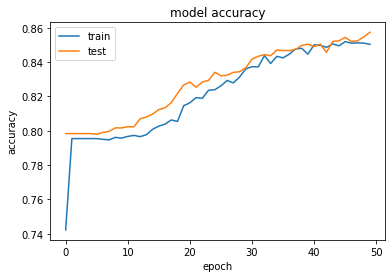

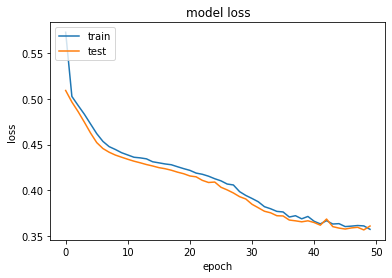

In [160]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy   #plotting the grap between accuracy and val_accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss     #Plotting the grap between loss and val_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [161]:
test_loss2, test_acc2 = model2.evaluate(X_test_std, Y_test)
print('\nTest accuracy:[With middle layer]: %0.2f' %(test_acc2*100))

3000/3000 [==============================] - 0s 65us/sample - loss: 0.3608 - accuracy: 0.8573

Test accuracy:[With middle layer]: 85.73


# 8. Predict the results using 0.5 as a threshold (5 points)

In [162]:
# predict the model
y_predict = model2.predict(X_test_std)
y_predict

array([[0.27155456],
       [0.09032307],
       [0.01234424],
       ...,
       [0.00312386],
       [0.01431824],
       [0.09937522]], dtype=float32)

In [163]:
# keeping 0.5 as a threshold 
y_predict = (y_predict > 0.5) #to classify each probability into True or False
y_predict

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# 9. Print the Accuracy score and confusion matrix (2.5 points)

In [164]:
test_acc = metrics.accuracy_score(Y_test,y_predict)
print('\nTest accuracy:[With customized sgd with threshold as 0.5]: %0.2f' %(test_acc*100))


Test accuracy:[With customized sgd with threshold as 0.5]: 85.73


In [165]:
print("Confusion matrix:")
metrics.confusion_matrix(Y_test, y_predict)

Confusion matrix:


array([[2337,   58],
       [ 370,  235]])

In [166]:
cr = metrics.classification_report(Y_test,y_predict)
print("Classification Report: \n\n", cr)

Classification Report: 

               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92      2395
         1.0       0.80      0.39      0.52       605

    accuracy                           0.86      3000
   macro avg       0.83      0.68      0.72      3000
weighted avg       0.85      0.86      0.84      3000

